In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import KeyFunctions as me
import matplotlib as mlp
cm = 1/2.54 

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

In [2]:
#Get Evaporating Ouzo Data
concs = ['10-5', '10-9', '10-11', '10-14', '10-16']
dfO = me.GetFolderSpectra("CHIRANJEEVI", "r6g(Evap Ouzo)", concs)
col_names = np.array(dfO.columns)

In [3]:
#Get and Process Ag Rings Data
from scipy import signal

Source = "CHIRANJEEVI"
Chemical = "r6g(Ag Nano Rings)"

dfA1 = pd.DataFrame()
for j in [6,9]:
    Concentration = "10-" + str(j)
    for i in [1, 2, 3, 4, 5]:
        temp = me.GetSpectra(Source, Chemical, Concentration, str(i))
        temp.set_index("#Wave", inplace = True)
        targ_len = len(temp)
        temp = temp.transpose()
        temp = temp.rename({'#Intensity':Concentration}, axis = 0)
        temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
        dfA1 = pd.concat([dfA1, temp], axis = 0)  
        
for j in [5,7,8]:
    Concentration = "10-" + str(j)
    for i in [1, 2, 3, 4, 5]:
        temp = me.GetSpectra(Source, Chemical, Concentration, str(i))
        temp.set_index("#Wave", inplace = True)
        temp = signal.resample(temp, targ_len)
        temp = np.reshape(temp, [targ_len])
        temp = pd.DataFrame(temp)
        temp = temp.transpose()
        temp = temp.rename({0:Concentration}, axis = 0)
        temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
        dfA1 = pd.concat([dfA1, temp], axis = 0) 
        
dfA1.set_axis(col_names, axis =1, inplace = True)
dfA1.sort_index(inplace = True)
dfA1

/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/1818513908.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/1818513908.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/1818513908.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/1818513908.

,1800.529297,1798.058594,1795.587891,1793.115234,1790.642578,1788.169922,1785.697266,1783.222656,1780.746094,1778.269531,...,574.373047,571.517578,568.662109,565.804688,562.947266,560.089844,557.230469,554.369141,551.507813,548.646484
10-5,79.153548,434.931357,356.681303,77.423889,404.489738,-497.535549,-102.397173,-484.680631,75.365756,-367.133449,...,2487.633271,8452.606122,21908.895392,34589.325664,29236.989062,15624.124203,10370.199417,6903.332582,5382.262723,844.172560
10-5,853.390320,192.293776,696.450373,181.551689,381.813883,-148.480791,-723.716465,-1205.674860,-58.038173,-170.422497,...,2209.760025,6959.879778,19876.981434,28355.637758,21162.560413,10283.185372,8268.559538,5580.841708,4753.506271,336.794897
10-5,-7.296946,-343.062694,-161.462322,-738.686959,-235.021156,-239.063876,8.571503,-682.030821,716.934865,328.179146,...,3157.024479,8602.617061,22364.565397,33057.676616,27655.106409,16169.739715,12647.853968,9824.627041,7292.396919,694.736302
10-5,135.999101,-672.804287,-570.612403,-1669.868573,-844.629838,-858.391018,-1029.142704,-1490.420975,-652.229271,-1622.707471,...,748.691824,8102.995686,24762.687234,32285.934095,24179.583386,10658.547081,6680.359355,3732.020394,3435.788304,-1564.654216
10-5,275.196644,645.082274,666.674176,-265.708027,459.125246,88.667887,217.441342,-77.464915,871.735569,760.898503,...,4507.753980,11250.957917,27050.271470,39429.197897,36041.696342,25721.880372,22628.453214,16740.589541,11358.734903,1464.891001
10-6,-1703.744740,-117.852180,-194.875670,601.174620,146.925890,537.876900,184.584450,110.133810,1326.333490,-1548.287300,...,1248.795760,208.468320,622.903400,-1328.581120,1035.136110,238.195030,1067.456310,-1745.596420,-1126.572190,NaN
10-6,578.263611,672.665649,-433.932922,85.725266,-123.281952,-79.561722,-330.249298,-1260.067261,224.326187,-736.488647,...,573.523987,61.470486,342.719757,-1266.917236,290.793945,-816.751282,-199.618912,-142.865067,-124.768097,NaN
10-6,-727.042280,1451.406650,-1125.559850,569.099440,326.681400,-561.681340,-320.036200,-540.875790,1225.788120,-825.595280,...,606.706560,827.452610,-283.874290,-2652.813350,667.315290,118.130010,794.885280,-965.419460,214.218540,NaN
10-6,-1372.311570,-731.729060,55.581100,178.137950,-7.581610,784.487110,-236.063000,-811.693830,1971.212010,-754.490970,...,2554.577450,1790.539890,582.852970,-1387.084140,2030.219180,1476.614840,1289.664020,-2428.585140,-2015.723140,NaN
10-6,-981.582770,-225.369400,-1710.623880,488.973420,-1798.426070,1303.825270,1930.111740,275.788500,2049.625820,1642.945280,...,2352.058840,2023.234220,1924.929440,-2440.480810,430.500510,596.175330,1070.582620,-2959.949230,-845.668120,NaN


In [4]:
#Get and Process Ag Rings Data Second Set

Source = "CHIRANJEEVI"
Chemical = "r6g(Ag Nano Rings 2)"

dfA2 = pd.DataFrame()
for j in [6,9]:
    Concentration = "10-" + str(j)
    for i in [1, 2, 3, 4, 5]:
        temp = me.GetSpectra(Source, Chemical, Concentration, str(i))
        temp.set_index("#Wave", inplace = True)
        targ_len = len(temp)
        temp = temp.transpose()
        temp = temp.rename({'#Intensity':Concentration}, axis = 0)
        temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
        dfA2 = pd.concat([dfA2, temp], axis = 0)  
        
for j in [5,7,8]:
    Concentration = "10-" + str(j)
    for i in [1, 2, 3, 4, 5]:
        temp = me.GetSpectra(Source, Chemical, Concentration, str(i))
        temp.set_index("#Wave", inplace = True)
        temp = signal.resample(temp, targ_len)
        temp = np.reshape(temp, [targ_len])
        temp = pd.DataFrame(temp)
        temp = temp.transpose()
        temp = temp.rename({0:Concentration}, axis = 0)
        temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
        dfA2 = pd.concat([dfA2, temp], axis = 0) 
        
dfA2.set_axis(col_names, axis =1, inplace = True)
dfA2.sort_index(inplace = True)
dfA2

/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/653356472.py:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/653356472.py:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/653356472.py:15: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/653356472.py:1

,1800.529297,1798.058594,1795.587891,1793.115234,1790.642578,1788.169922,1785.697266,1783.222656,1780.746094,1778.269531,...,574.373047,571.517578,568.662109,565.804688,562.947266,560.089844,557.230469,554.369141,551.507813,548.646484
10-5,314.455048,-381.376093,382.373382,-350.101775,319.766728,-332.606197,346.325366,-82.479989,750.478186,216.194956,...,4943.009031,10463.675050,26055.467538,35605.497749,25594.465873,10635.891647,6911.784461,5014.785693,4800.634190,349.939196
10-5,928.670977,118.290376,896.385375,-359.213890,167.990349,-543.084325,-69.137400,-766.882284,-63.771608,-579.993130,...,4187.744448,9501.791186,24305.570921,33276.180675,23860.960453,9642.112644,6268.746005,4057.302552,3875.493865,165.040183
10-5,177.529166,-131.436216,481.923129,-234.352495,308.169952,-332.291565,223.462891,-301.721613,199.915409,-111.468642,...,3705.699428,8802.930098,21642.219498,31349.444673,23575.368049,9838.342894,6050.407888,4103.688107,4042.197671,326.225603
10-5,1114.223905,623.809628,996.004401,-57.192192,291.693294,-406.710522,-90.374678,-686.522315,-120.140370,-873.779464,...,4288.629613,10075.176322,26104.138873,37064.448855,27613.074685,11706.751357,7371.190716,4890.329178,4563.268014,514.328385
10-5,345.209789,-251.370656,565.808372,-268.397785,500.658508,-275.340570,335.781860,-276.750511,307.862800,-333.881280,...,4168.403525,8998.068245,22675.079544,31965.190544,23702.556843,9656.735239,6060.135118,3793.774941,3556.543947,133.069529
10-6,-1051.341431,330.191101,-107.819061,485.228729,280.002655,147.645248,159.400055,-367.400543,552.781067,-904.770752,...,717.107849,-237.915115,-396.803436,-1005.925964,-80.164047,255.841553,426.242126,-757.097046,308.728271,NaN
10-6,-194.184630,841.462880,-859.920010,425.131920,-191.583080,411.492030,-412.496100,-768.895940,280.692930,-412.590960,...,886.298980,1366.002900,-59.825010,-1888.498920,-1125.202770,-438.822560,755.345960,-339.720630,166.784600,NaN
10-6,578.263611,672.665649,-433.932922,85.725266,-123.281952,-79.561722,-330.249298,-1260.067261,224.326187,-736.488647,...,573.523987,61.470486,342.719757,-1266.917236,290.793945,-816.751282,-199.618912,-142.865067,-124.768097,NaN
10-6,-1410.822750,46.968030,-341.634110,-99.162580,-351.616930,676.132540,606.264430,-41.545470,559.438030,-331.304380,...,919.861730,-199.832310,119.662020,-1270.784800,154.770560,771.408030,180.970650,-1132.487350,-251.069030,NaN
10-6,-933.227270,85.536780,-602.949520,281.157240,-628.860080,1134.225150,432.131310,-208.768910,765.972080,-628.227230,...,-301.847850,-974.589320,-528.719830,-2044.063850,216.892920,80.638470,1210.052910,-1289.794180,330.103560,NaN


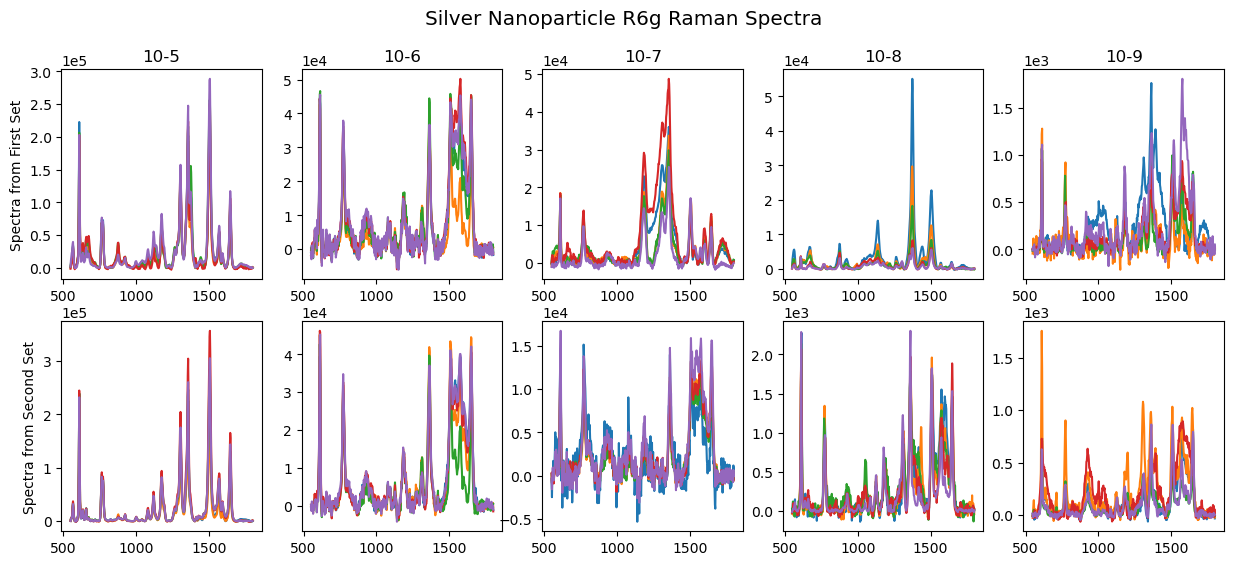

In [5]:


fig, ax = plt.subplots(2, 5, figsize = [15, 6], squeeze = True)
count = 5
count1 = 1
ax[0, 0].set_ylabel('Spectra from First Set')
for ind, row in dfA1.iterrows():
        ax[0, count-5].plot(row)
        count1 += 1
        if count1 == 6:
            ax[0, count-5].set_title(ind)
            ax[0, count-5].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
            count += 1
            count1 = 1

count = 5
count1 = 1
ax[1, 0].set_ylabel('Spectra from Second Set')
for ind, row in dfA2.iterrows():
        ax[1, count-5].plot(row)
        ax[1, count-5].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
        count1 += 1
        if count1 == 6:
            count += 1
            count1 = 1

plt.suptitle('Silver Nanoparticle R6g Raman Spectra', fontsize = 'x-large');
plt.savefig("Tables and Figures\SVG Files\AgNano R6g Spectra.svg", format = "svg", bbox_inches='tight')

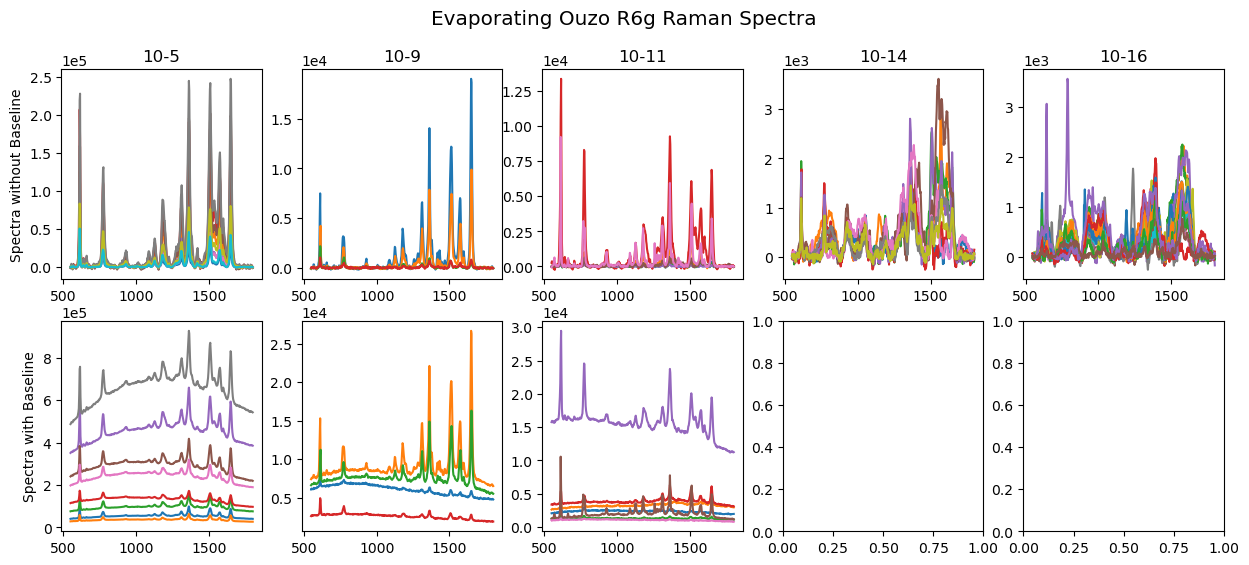

In [6]:
fig, ax = plt.subplots(2, 5, figsize = [15, 6], squeeze = True)

count = 0
ax[0, 0].set_ylabel('Spectra without Baseline')
for conc in concs:
    for ind, row in dfO.iterrows():
        if ind == conc:
            if row.iloc[0] < 500:
                ax[0, count].plot(row)
    ax[0, count].set_title(conc)
    ax[0, count].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
    count += 1
    
count = 0
ax[1, 0].set_ylabel('Spectra with Baseline')
for conc in concs:
    for ind, row in dfO.iterrows():
        if ind == conc:
            if row.iloc[0] >= 500:
                ax[1, count].plot(row)       
    ax[1, count].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
    count += 1
    
plt.suptitle('Evaporating Ouzo R6g Raman Spectra', fontsize = 'x-large');
plt.savefig("Tables and Figures\SVG Files\Ouzo R6g Spectra.svg", format = "svg", bbox_inches='tight')

In [7]:
#Import Triclosan Data

from sympy.discrete.transforms import fwht, ifwht
import glob

Source = "CHIRANJEEVI"
Chemical = "triclosan"
concs = ['10-3', '10-4', '10-5', '5x10-4', '5x10-5']
dfT1 = me.GetFolderSpectra(Source, Chemical, concs)
dfT1 = dfT1.fillna(0)
dfT1

#Wave,1678.89356,1677.90527,1676.91699,1675.92871,1674.93945,1673.95019,1672.96094,1671.97168,1670.98242,1669.99219,...,560.59473,559.35352,558.11133,556.87012,555.62793,554.38574,553.14355,551.90039,550.65723,549.41309
10-3,1.140000e-06,803.91326,212.17604,523.51270,-134.01151,-528.83656,-693.36907,-637.62069,-1135.26340,-1234.43909,...,-964.57539,-1536.98035,-938.15243,-1285.29383,-2022.83409,-1987.30284,-2039.53070,-1398.54074,-1580.92222,-1157.09681
10-3,9.715000e-06,31.08563,132.99934,246.48968,-719.84705,110.95344,-64.67957,147.24956,-783.75650,-1004.95590,...,-868.29363,-988.43678,-475.00282,-516.90262,-1180.14358,-1004.03575,-320.27738,-336.10290,-957.75467,-1484.70335
10-3,0.000000e+00,234.03825,169.39087,239.07406,212.66762,-185.71085,-387.22989,-704.30497,-643.48916,-560.84853,...,-760.03994,-524.99449,-588.54666,-848.27850,-538.77372,-712.70290,-1024.82625,-594.75487,-767.23939,-785.19551
10-3,-7.200000e-06,390.37522,718.71816,-168.86680,-103.62424,-565.21858,-226.89914,-299.66452,-805.14867,335.75792,...,-35.00047,460.14516,266.56970,-496.87227,-712.73714,-404.59199,-750.21206,-249.22904,-618.36192,-680.77479
10-3,-2.947660e+00,713.00616,824.43912,244.16145,527.35494,-190.32680,-296.60157,188.18057,-347.54259,-80.78285,...,266.13622,252.12777,1048.17205,124.19489,66.55289,-507.33584,-29.23381,-260.74960,-256.21402,43.88644
10-4,0.000000e+00,91.56992,-256.21206,230.15033,477.26826,202.03865,186.21786,116.24838,-389.10039,-88.33468,...,-64.22633,-217.68329,331.95544,74.02234,-522.31438,238.54741,-358.94196,-15.47522,105.28943,-120.16981
10-4,-1.538460e-06,64.97535,300.61571,170.03607,302.88063,243.89084,-202.40939,222.40811,255.90094,-18.57744,...,-98.77979,-106.29521,81.14031,-287.67084,-257.63401,-166.54447,213.81379,-64.35313,5.61686,252.65943
10-4,1.000000e-06,-126.62877,2.22403,-137.00185,-20.35683,-80.77035,-154.39458,-349.30803,-79.09367,-289.85743,...,-278.88764,272.71481,-166.37311,-695.02377,-120.32215,-465.37613,-90.37318,391.16367,-26.23077,-134.47463
10-4,1.490000e-06,-13.54761,238.19620,366.56013,337.61323,642.79272,164.13937,30.61773,-13.04572,77.86165,...,496.43938,475.93196,488.11697,51.76524,119.60932,-219.83977,179.87062,90.91498,-224.02607,308.76158
10-4,0.000000e+00,-117.77229,2.06848,-127.41988,-18.93306,-75.12124,-143.59615,-324.87726,-73.56181,-269.58466,...,-259.38211,253.64101,-154.73689,-646.41348,-111.90676,-432.82750,-84.05244,363.80549,-24.39618,-125.06941


In [8]:
Source = "TULSI"
Chemical = "triclosan"
concs = ['10-5', '10-6', '10-7', '10-8', '10-9', '10-10']
dfT2 = me.GetFolderSpectra(Source, Chemical, concs)
dfT2 = dfT2.fillna(0)
dfT2

#Wave,1796.204102,1795.239258,1794.274414,1793.309570,1792.344727,1791.378906,1790.413086,1789.447266,1788.481445,1787.515625,...,705.568359,704.359375,703.149414,701.939453,700.729492,699.518555,698.308594,697.096680,695.885742,694.673828
10-5,-340.029968,-22.117735,-240.809662,-63.614494,287.401672,-90.517311,-80.379234,235.105453,208.823380,80.670319,...,-325.601410,-63.348034,483.322327,-79.076019,-85.276176,-37.671341,162.422455,442.771759,275.110443,-116.378769
10-5,127.458267,333.495422,363.990509,131.786636,70.427505,298.412476,-32.752983,77.555351,178.000229,-125.689636,...,98.723976,140.014877,425.471344,51.388767,151.723740,24.346918,154.851471,75.651436,-179.950851,-423.311157
10-5,724.639954,1198.339111,126.166222,433.063019,52.806156,322.611603,-94.966515,116.359970,-264.445099,-305.578857,...,60.784084,744.000977,901.293640,-202.224091,205.100311,-180.598434,160.619934,307.748505,429.256348,458.052185
10-5,81.930405,233.333359,-92.904755,86.444466,-84.575096,279.587555,-323.550690,-286.338013,85.103531,-581.904114,...,39.886547,741.176392,1035.973267,407.328430,577.052246,41.521965,248.682404,654.998413,281.865479,-699.543884
10-5,-55.105888,216.887009,383.440033,102.423119,122.159035,377.894135,-69.139107,134.911880,213.762405,97.861687,...,-58.248238,117.751122,241.576202,167.025436,108.025002,4.622633,74.798286,134.957260,-131.396011,-128.490234
10-5,96.464005,7.887391,49.434689,-9.287214,396.720093,199.394333,329.986603,213.382828,53.354664,-106.270645,...,188.981186,141.837585,275.945374,123.965408,89.260666,-38.270603,93.151627,24.457678,-157.728592,16.959412
10-6,13.045375,-83.252022,94.117821,-48.687550,40.461811,33.757481,145.188004,42.007053,97.984467,-101.970688,...,-92.456726,40.573006,-148.595200,70.919899,-85.024612,-21.620447,-139.984955,329.033478,266.869568,243.221909
10-6,-446.746307,143.261322,-20.657722,-233.896088,1.420037,102.139008,16.712317,-143.917511,349.706512,234.434753,...,-266.070953,-176.540222,-97.245911,144.632370,18.051062,51.766300,17.379976,237.475647,119.913605,-172.944824
10-6,24.910767,131.101868,4.794878,35.916225,64.319916,30.563753,215.659073,462.105225,35.171761,115.427635,...,-2.759302,55.699669,35.495560,-157.897491,95.046257,-16.358177,84.056252,165.993256,258.311401,322.090057
10-7,41.801140,-127.203186,-161.517349,-25.775005,135.459305,-80.155045,72.811920,104.305656,37.602440,112.420738,...,-42.025768,-19.617884,70.680611,123.884850,127.692299,-146.176346,176.528976,55.033730,30.300364,-2.535544


In [9]:
dfT, labels = me.ConstructCombinedTriclosanDataset()
display(labels)

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:203: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:203: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:203: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

['10-3', '10-4', '10-5', '10-7', '10-8', '10-9']

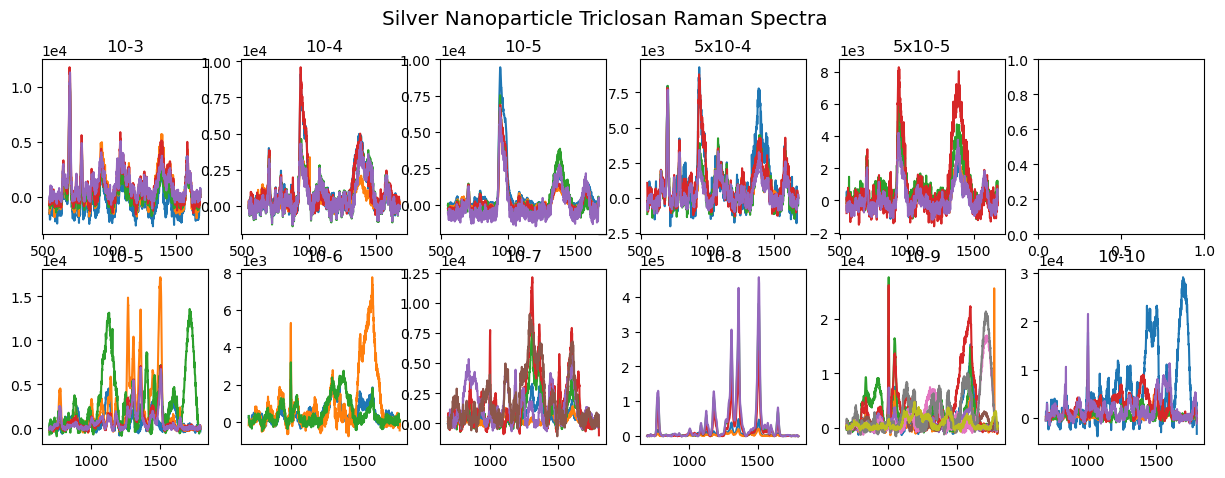

In [10]:
fig, ax = plt.subplots(2, 6, figsize = [15, 5], squeeze = True)
count = 5
count1 = 1

for ind, row in dfT1.iterrows():
        ax[0, count-5].plot(row)
        count1 += 1
        if count1 == 6:
            ax[0, count-5].set_title(ind)
            ax[0, count-5].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
            count += 1
            count1 = 1

count = 0
for conc in concs:
    for ind, row in dfT2.iterrows():
           if ind == conc:
                if row.iloc[0] < 500:
                    ax[1, count].plot(row)
    ax[1, count].set_title(conc)
    ax[1, count].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
    count += 1
    
    
plt.suptitle('Silver Nanoparticle Triclosan Raman Spectra', fontsize = 'x-large');

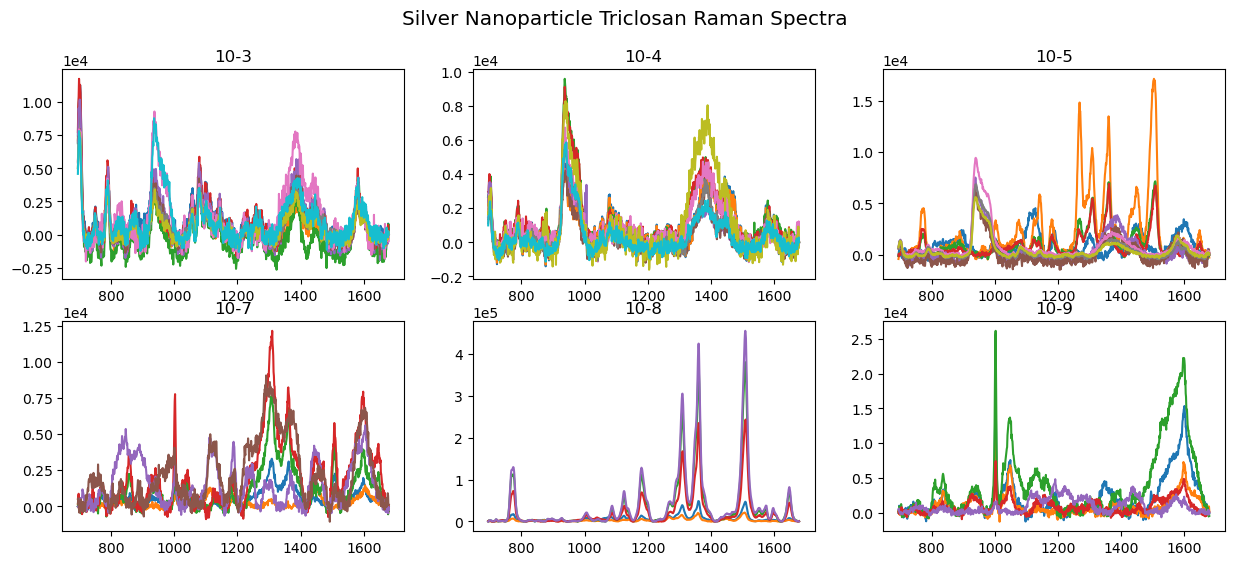

In [11]:
fig, ax = plt.subplots(2, 3, figsize = [15, 6], squeeze = True)

count = 0
count1 = 0
for conc in labels:
    for ind, row in dfT.iterrows():
            if ind == conc:
                if row.iloc[0] < 500:
                    ax[count1, count].plot(row)
    ax[count1, count].set_title(conc)
    ax[count1, count].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
    count += 1
    if count == 3:
        count = 0
        count1 = 1

plt.suptitle('Silver Nanoparticle Triclosan Raman Spectra', fontsize = 'x-large');
plt.savefig("Tables and Figures\SVG Files\AgNano Triclosan Spectra.svg", format = "svg", bbox_inches='tight')

In [12]:
dfC1, labels = me.ConstructCombinedChlorDataset(1)
dfC2, labels = me.ConstructCombinedChlorDataset(2)
dfC, labels = me.ConstructCombinedChlorDataset()
display(labels)

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/GoogleDrive-102961739539087599952/My Drive/MITACs/Finalized Code and Data/KeyFunctions.py:264: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  temp.set_axis(np.array(range(targ_len)), axis =1, inplace = True)
/Volumes/Goog

['10-3', '10-4', '10-5', '10-6', '10-7']

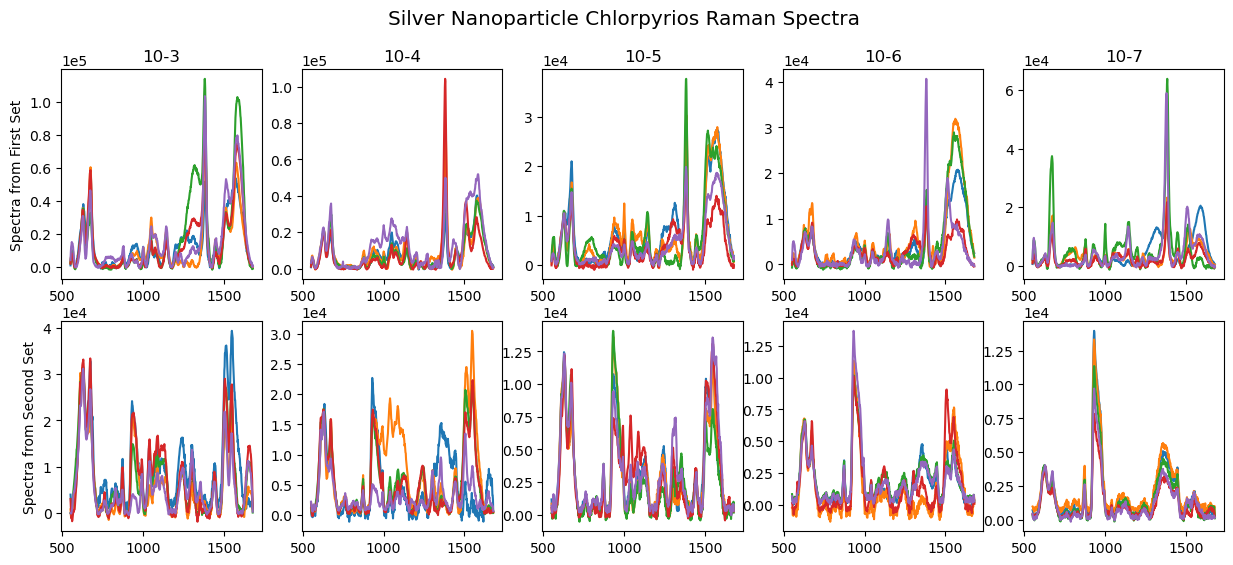

In [13]:
fig, ax = plt.subplots(2, 5, figsize = [15, 6], squeeze = True)
count = 5
count1 = 1
ax[0, 0].set_ylabel('Spectra from First Set')
for ind, row in dfC1.iterrows():
        ax[0, count-5].plot(row)
        count1 += 1
        if count1 == 6:
            ax[0, count-5].set_title(ind)
            ax[0, count-5].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
            count += 1
            count1 = 1

count = 5
count1 = 1
ax[1, 0].set_ylabel('Spectra from Second Set')
for ind, row in dfC2.iterrows():
        ax[1, count-5].plot(row)
        ax[1, count-5].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
        count1 += 1
        if count1 == 6:
            count += 1
            count1 = 1

plt.suptitle('Silver Nanoparticle Chlorpyrios Raman Spectra', fontsize = 'x-large');
plt.savefig("Tables and Figures\SVG Files\AgNano Chlorpyrifos Spectra.svg", format = "svg", bbox_inches='tight')

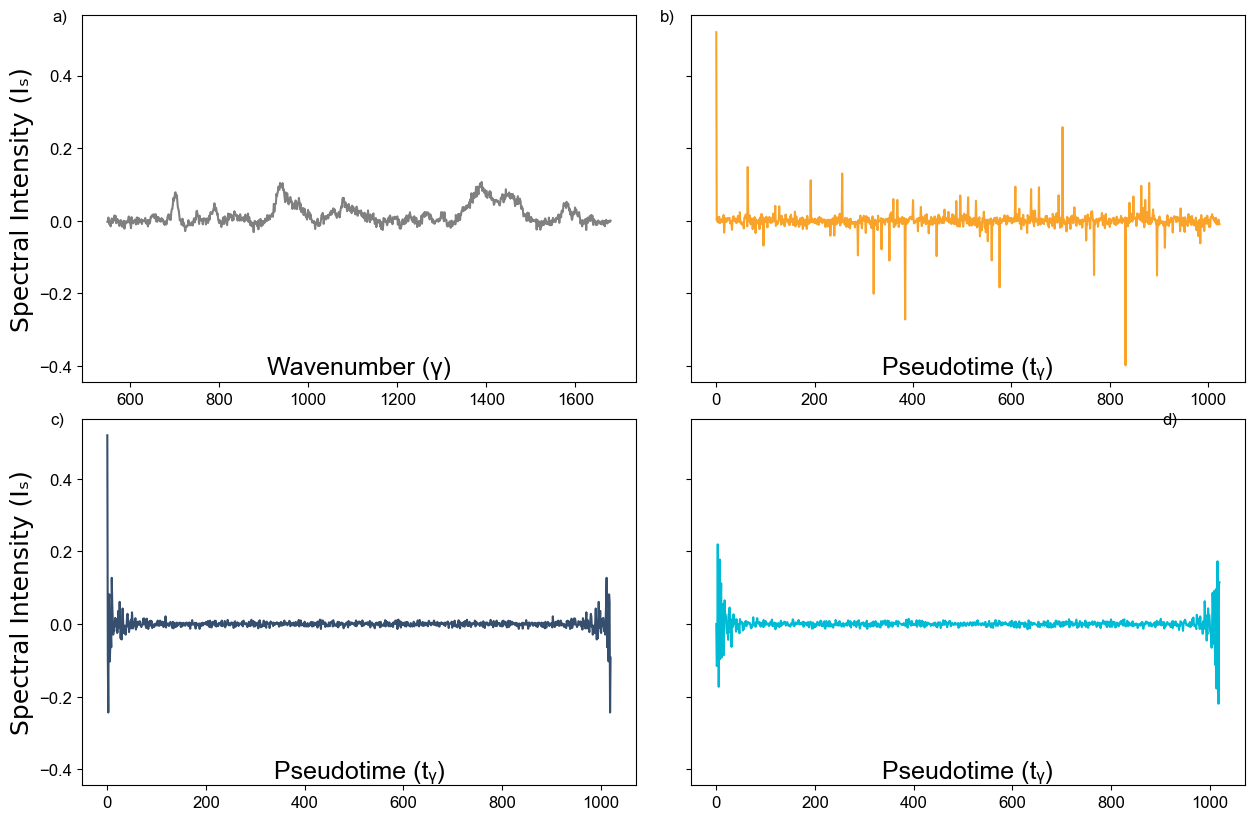

In [24]:
from mpl_toolkits.mplot3d import axes3d
from sympy.discrete.transforms import fwht
from sklearn.preprocessing import normalize

spectra = dfT1.iloc[9, :].to_numpy()
hspectra = np.array(fwht(spectra)).astype(np.float64)
fspectra = np.array(np.fft.fft(spectra))
br = len(fspectra.real)
fspectra = np.concatenate([fspectra.real, fspectra.imag])

spectra = normalize(spectra.reshape(1, -1))[0]
hspectra = normalize(hspectra.reshape(1, -1))[0]
fspectra = normalize(fspectra.reshape(1,-1))[0]


fig, ax = plt.subplots(2, 2, figsize = [15, 10], sharey = True)

plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
ax[0,0].plot(dfT1.columns, spectra, '#808080')
ax[0,0].set_xlabel('Wavenumber (γ)', size = 18)
ax[0,0].xaxis.set_label_coords(.5, 0.07)
ax[0,1].plot(range(len(hspectra)), hspectra, '#FAA32B');
ax[0,1].set_xlabel(u'Pseudotime (t\u1D67)', size = 18)
ax[0,1].xaxis.set_label_coords(.5, 0.07)
ax[1,0].plot(range(br), fspectra[0:br], '#364F6E');
ax[1,1].plot(range(br), fspectra[br:], '#00BBD6');
ax[1,0].set_xlabel(u'Pseudotime (t\u1D67)', size = 18)
ax[1,0].xaxis.set_label_coords(.5, 0.07)
ax[1,1].set_xlabel(u'Pseudotime (t\u1D67)', size = 18)
ax[1,1].xaxis.set_label_coords(.5, 0.07)
ax[0,0].set_ylabel(u'Spectral Intensity (I\u209B)', family = ['DejaVu Sans'], size = 18)
ax[1,0].set_ylabel(u'Spectral Intensity (I\u209B)', family = ['DejaVu Sans'], size = 18)

ax[0,0].annotate("a)", xy = (425, 0.55), annotation_clip = False)
ax[0,1].annotate("b)", xy = (-115, 0.55), annotation_clip = False)
ax[1,0].annotate("c)", xy = (-115, 0.55), annotation_clip = False)
ax[1,1].annotate("d)", xy = (905, 0.55), annotation_clip = False)


plt.savefig("Tables and Figures\SVG Files\Transform Comparison.svg", format = "svg", bbox_inches='tight');
plt.savefig("Tables and Figures\PNG Files\Transform Comparison.png", format = "png", bbox_inches='tight');
plt.savefig("Tables and Figures\PNG Files\Transform Comparison No Bck.png", format = "png", bbox_inches='tight', transparent  = True);

In [15]:
def SegregateData(df):
    wavenums = df.columns.to_list()
    dfList = []
    concList = []
    for ind, row in df.iterrows():
        if ind not in concList:
            concList.append(ind)
            dfList.append(row)
        else:
            loc = concList.index(ind)
            dfList[loc] = pd.concat([dfList[loc], row], axis = 1)
    
    for i in range(len(dfList)):
        dfList[i] = dfList[i].transpose()
        
    dfList.sort(key = lambda x: int(x.index[0].split('-', 1)[-1]))
            
    return dfList


In [16]:
dfCList = SegregateData(dfC)
wavenums = dfC.columns.to_list()

count = 0;
Csolopeaks = []
for i in dfCList:
    dist = me.PeakDistribution(i, False)
    peakcount = dist.value_counts()
    Csolopeaks.append(peakcount[1]/(peakcount[1:-1].sum()))
    count += 1
   
dfTList = SegregateData(dfT)
wavenums = dfT.columns.to_list()

count = 0;
Tsolopeaks = []
for i in dfTList:
    dist = me.PeakDistribution(i, False)
    peakcount = dist.value_counts()
    Tsolopeaks.append(peakcount[1]/(peakcount[1:-1].sum()))
    count += 1

dfR = pd.concat([dfO, dfA1, dfA2], axis = 0)
dfRList = SegregateData(dfR)
wavenums = dfR.columns.to_list()

count = 0;
Rsolopeaks = []
for i in dfRList:
    dist = me.PeakDistribution(i, False)
    peakcount = dist.value_counts()
    Rsolopeaks.append(peakcount[1]/(peakcount[1:-1].sum()))
    count += 1

/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/1974152489.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Csolopeaks.append(peakcount[1]/(peakcount[1:-1].sum()))
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/1974152489.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Csolopeaks.append(peakcount[1]/(peakcount[1:-1].sum()))
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/1974152489.py:9: FutureWarning: The behavior of `se

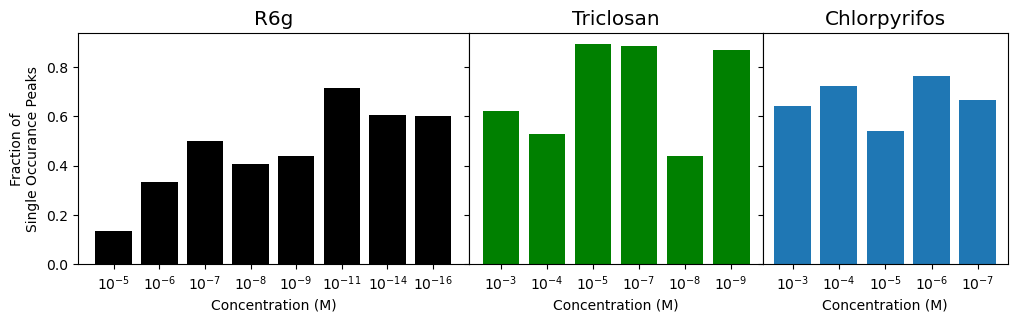

In [17]:
fig, ax = plt.subplots(1, 3, figsize = [12, 3], sharey = True, gridspec_kw={'width_ratios': [1.6, 1.2, 1]})
plt.subplots_adjust(hspace = 0.3, wspace = 0)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

Cxlabels = dfC.index.unique().tolist()
Cxlabels.sort(key = lambda x: int(x.split('-', 1)[-1]))
for i in Cxlabels:
    strarray = i.split('0', 1)
    strarray[1] = '^{'+strarray[1]+'}'
    Cxlabels[Cxlabels.index(i)] = '$'+strarray[0]+'0'+strarray[1]+'$'

Txlabels = dfT.index.unique().tolist()
Txlabels.sort(key = lambda x: int(x.split('-', 1)[-1]))
for i in Txlabels:
    strarray = i.split('0', 1)
    strarray[1] = '^{'+strarray[1]+'}'
    Txlabels[Txlabels.index(i)] = '$'+strarray[0]+'0'+strarray[1]+'$'
    
Rxlabels = dfR.index.unique().tolist()
Rxlabels.sort(key = lambda x: int(x.split('-', 1)[-1]))
for i in Rxlabels:
    strarray = i.split('0', 1)
    strarray[1] = '^{'+strarray[1]+'}'
    Rxlabels[Rxlabels.index(i)] = '$'+strarray[0]+'0'+strarray[1]+'$'

ax[2].bar(x = Cxlabels, height = Csolopeaks)
ax[2].set_xlabel('Concentration (M)')
ax[0].set_ylabel('Fraction of\nSingle Occurance Peaks')
ax[2].set_title('Chlorpyrifos')

ax[1].bar(x = Txlabels, height = Tsolopeaks, color = 'g')
ax[1].set_xlabel('Concentration (M)')
ax[1].set_title('Triclosan')

ax[0].bar(x = Rxlabels, height = Rsolopeaks, color = 'k')
ax[0].set_xlabel('Concentration (M)')
ax[0].set_title('R6g');

plt.savefig("Tables and Figures\SVG Files\Single Peaks.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures\PNG Files\Single Peaks.png", format = "png", bbox_inches='tight')

/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/3897422786.py:46: UserWarning: Glyph 8347 (\N{LATIN SUBSCRIPT SMALL LETTER S}) missing from current font.
  plt.savefig("Tables and Figures\SVG Files\Selected R6g Spectra.svg", format = "svg", bbox_inches='tight')
/var/folders/rt/kfspsbmj18v0_6yw2v3stm200000gn/T/ipykernel_89580/3897422786.py:47: UserWarning: Glyph 8347 (\N{LATIN SUBSCRIPT SMALL LETTER S}) missing from current font.
  plt.savefig("Tables and Figures\PNG Files\Selected R6g Spectra.png", format = "png", bbox_inches='tight')
/Users/vish/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8347 (\N{LATIN SUBSCRIPT SMALL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


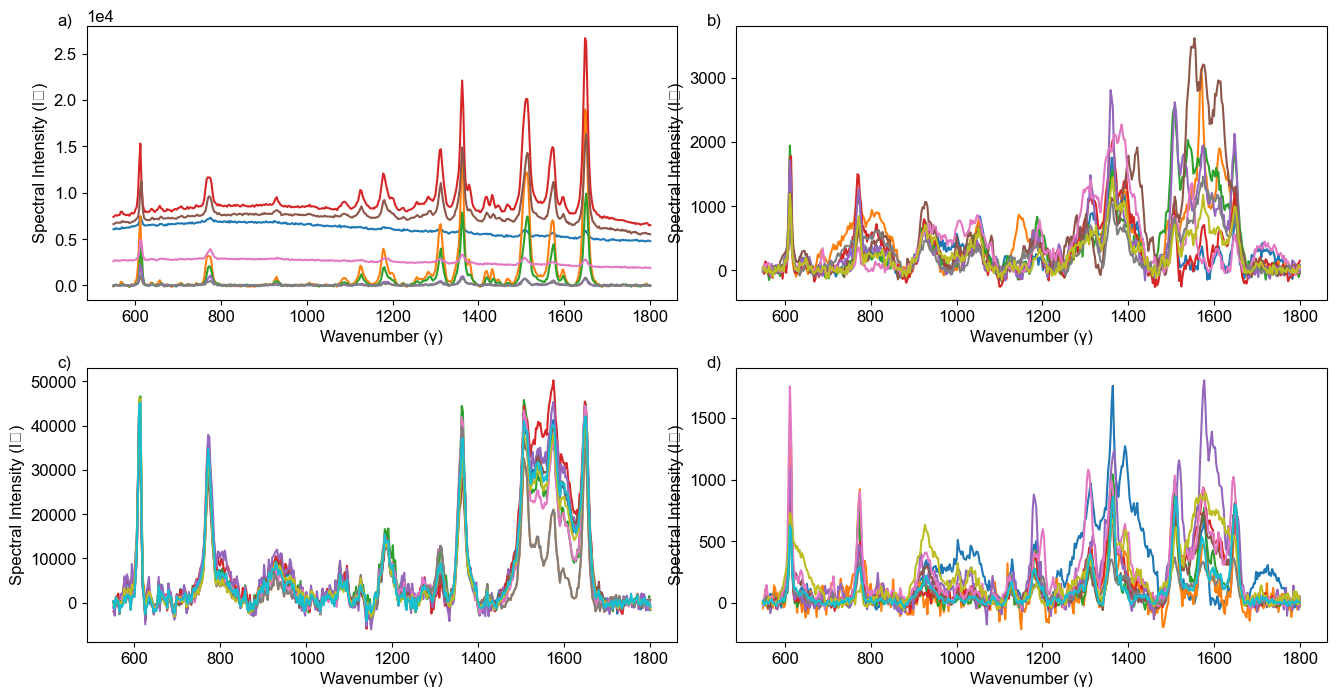

In [18]:
fig, ax = plt.subplots(2, 2, figsize = [16, 8])

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}
plt.subplots_adjust(hspace = 0.25, wspace = 0.1)

ax[0, 0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))

for ind, row in dfO.iterrows():
    if ind == '10-9':
        ax[0, 0].plot(row)
ax[0, 0].set_xlabel('Wavenumber (γ)')
ax[0, 0].set_ylabel(u'Spectral Intensity (I\u209B)')

        
for ind, row in dfO.iterrows():
    if ind == '10-14':
        ax[0, 1].plot(row)
ax[0, 1].set_xlabel('Wavenumber (γ)')
ax[0, 1].set_ylabel(u'Spectral Intensity (I\u209B)')

for ind, row in dfA1.iterrows():
    if ind == '10-6':
        ax[1, 0].plot(row)
for ind, row in dfA2.iterrows():
    if ind == '10-6':
        ax[1, 0].plot(row)
ax[1, 0].set_xlabel('Wavenumber (γ)')
ax[1, 0].set_ylabel(u'Spectral Intensity (I\u209B)')

for ind, row in dfA1.iterrows():
    if ind == '10-9':
        ax[1, 1].plot(row)
for ind, row in dfA2.iterrows():
    if ind == '10-9':
        ax[1, 1].plot(row)
ax[1, 1].set_xlabel('Wavenumber (γ)')
ax[1, 1].set_ylabel(u'Spectral Intensity (I\u209B)')

ax[0,0].annotate("a)", xy = (-0.05,1), xycoords = 'axes fraction',annotation_clip = False)
ax[0,1].annotate("b)", xy = (-0.05,1), xycoords = 'axes fraction',annotation_clip = False)
ax[1,0].annotate("c)", xy = (-0.05,1), xycoords = 'axes fraction',annotation_clip = False)
ax[1,1].annotate("d)", xy = (-0.05,1), xycoords = 'axes fraction',annotation_clip = False)

plt.savefig("Tables and Figures\SVG Files\Selected R6g Spectra.svg", format = "svg", bbox_inches='tight')
plt.savefig("Tables and Figures\PNG Files\Selected R6g Spectra.png", format = "png", bbox_inches='tight')